In [1]:
import pandas as pd
from skfda import FDataGrid
import numpy as np
import matplotlib.pyplot as plt 
from skfda.exploratory.visualization.clustering import plot_clusters
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
diff = pd.read_pickle(r"C:\Python\Projects\crystal-phase-prediction\pkl_files\xray_hfo2.pkl")

In [3]:
q = pd.read_pickle(r"C:\Python\Projects\crystal-phase-prediction\pkl_files\xray_hfo2_q.pkl")

In [4]:
diff = diff.to_numpy()
diff

array([[0.        , 0.        , 0.        , ..., 0.00745482, 0.00688336,
        0.00627186],
       [0.        , 0.        , 0.        , ..., 0.00034315, 0.00030862,
        0.0002754 ],
       [0.        , 0.        , 0.        , ..., 0.0011607 , 0.00104545,
        0.00093162],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01023829, 0.00918891,
        0.00817576],
       [0.        , 0.        , 0.        , ..., 0.00579396, 0.0057109 ,
        0.00555715],
       [0.        , 0.        , 0.        , ..., 0.00079651, 0.00071328,
        0.0006306 ]])

In [5]:
q = q.to_numpy()

In [6]:
#change to datagrid object
data_matrix = diff
grid_points = q
grid_points
q = np.linspace(0, 8, 16000)
q

array([0.00000000e+00, 5.00031252e-04, 1.00006250e-03, ...,
       7.99899994e+00, 7.99949997e+00, 8.00000000e+00])

In [7]:
grid = FDataGrid(data_matrix, q)

In [8]:
import matplotlib.pyplot as plt

from skfda.ml.clustering import KMeans

In [24]:
n_clusters = 5
seed = 0

In [25]:
kmeans = KMeans(n_clusters=n_clusters, random_state = seed)
kmeans.fit(grid)
pred_labels = kmeans.predict(grid)


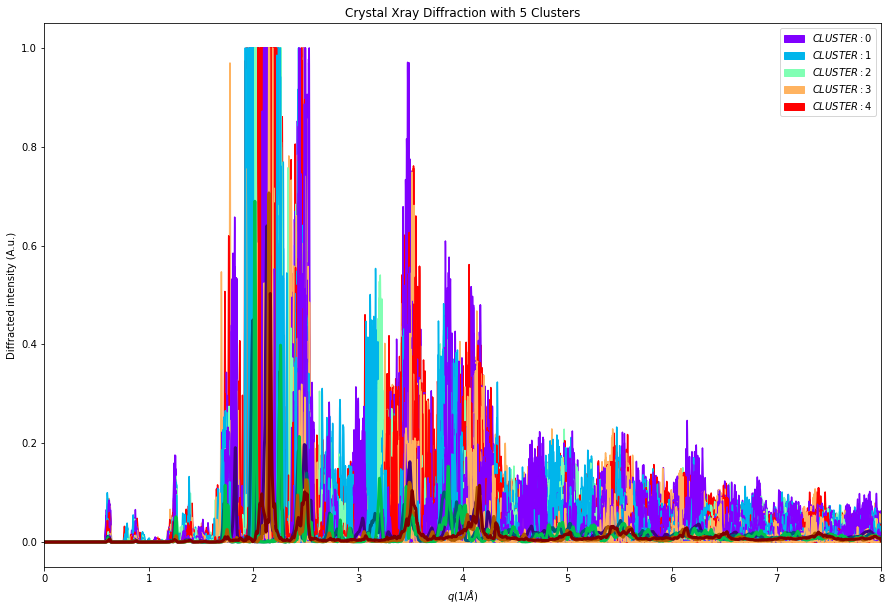

In [26]:
plot_clusters(kmeans, grid)
plt.xlim([q.min(), q.max()])
plt.xlabel('$q (1/\AA)$')
plt.ylabel('Diffracted intensity (A.u.)')
plt.title('Crystal Xray Diffraction with 5 Clusters')
plt.show()

In [51]:
pred_labels

array([2, 0, 3, ..., 0, 3, 3])

In [57]:
link = r"C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl"
df_labels = pd.read_pickle(link)
df_labels

,ID,labels_0_3,labels_0_4
0,Ag_HfO2_cat_3.125_222_m,m,m
1,Ag_HfO2_cat_3.125_222_o,o,o
2,Ag_HfO2_cat_3.125_222_p-o,p-o,p-o
3,Ag_HfO2_cat_3.125_222_t,t,t
4,Ag_HfO2_cat_6.25_122_m,m,m
...,...,...,...
1720,Zr_HfO2_inter_6.25_212_t,t,t
1721,Zr_HfO2_inter_6.25_221_m,m,m
1722,Zr_HfO2_inter_6.25_221_o,o,o
1723,Zr_HfO2_inter_6.25_221_p-o,p-o,unknown


In [58]:
df_labels['labels_0_4'].replace({'m':2, 'p-o':4, 'o':0, 't':1, 'unknown':3}, inplace=True)
y_true = df_labels["labels_0_4"]
y_true

0       2
1       0
2       4
3       1
4       2
       ..
1720    1
1721    2
1722    0
1723    3
1724    1
Name: labels_0_4, Length: 1725, dtype: int64

In [59]:
df_labels['pred_labels'] = pred_labels

In [60]:
df_labels.head(50)

,ID,labels_0_3,labels_0_4,pred_labels
0,Ag_HfO2_cat_3.125_222_m,m,2,2
1,Ag_HfO2_cat_3.125_222_o,o,0,0
2,Ag_HfO2_cat_3.125_222_p-o,p-o,4,3
3,Ag_HfO2_cat_3.125_222_t,t,1,3
4,Ag_HfO2_cat_6.25_122_m,m,2,2
5,Ag_HfO2_cat_6.25_122_p-o,p-o,4,3
6,Ag_HfO2_cat_6.25_122_t,t,3,0
7,Ag_HfO2_cat_6.25_212_m,m,2,2
8,Ag_HfO2_cat_6.25_212_o,o,0,0
9,Ag_HfO2_cat_6.25_212_p-o,p-o,4,3


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, pred_labels)

array([[333,   0,   0,  12,   0],
       [ 15,   1,   0,  84, 145],
       [  0, 226, 231,   0,   3],
       [ 50,   8,   3,  63, 147],
       [ 63,   0,   0, 270,  71]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, pred_labels)

0.4052173913043478